In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
HumidityDf=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/Relative_Humidity-2019.csv")
HumidityDf.describe()



,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,pollutant_standard,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,1550.000000,1550.0,1550.000000,1550.000000,1550.0,1550.000000,1550.000000,1550.000000,0.0,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,0.0,1550.0,1550.000000
mean,774.500000,36.0,61.269677,555.710968,62201.0,1.176129,41.691970,-75.696012,NaN,23.392903,97.481290,69.007641,86.820645,8.509677,NaN,11.0,32458.580645
std,447.590773,0.0,41.335698,761.973384,0.0,0.381053,0.910629,2.148074,NaN,2.407987,10.012741,14.711030,12.802824,8.349273,NaN,0.0,7327.099610
min,0.000000,36.0,5.000000,3.000000,62201.0,1.000000,40.743160,-79.318810,NaN,3.000000,13.000000,19.375000,28.000000,0.000000,NaN,11.0,18500.000000
25%,387.250000,36.0,13.000000,5.000000,62201.0,1.000000,40.867900,-77.548170,NaN,24.000000,100.000000,59.145833,83.000000,2.000000,NaN,11.0,27460.000000
50%,774.500000,36.0,59.000000,133.000000,62201.0,1.000000,41.051920,-73.878090,NaN,24.000000,100.000000,70.708333,92.000000,5.000000,NaN,11.0,35620.000000
75%,1161.750000,36.0,101.000000,1007.000000,62201.0,1.000000,42.499630,-73.763660,NaN,24.000000,100.000000,80.322917,95.000000,18.000000,NaN,11.0,35620.000000
max,1549.000000,36.0,119.000000,2004.000000,62201.0,2.000000,43.146180,-73.585490,NaN,24.000000,100.000000,98.875000,99.000000,23.000000,NaN,11.0,40380.000000


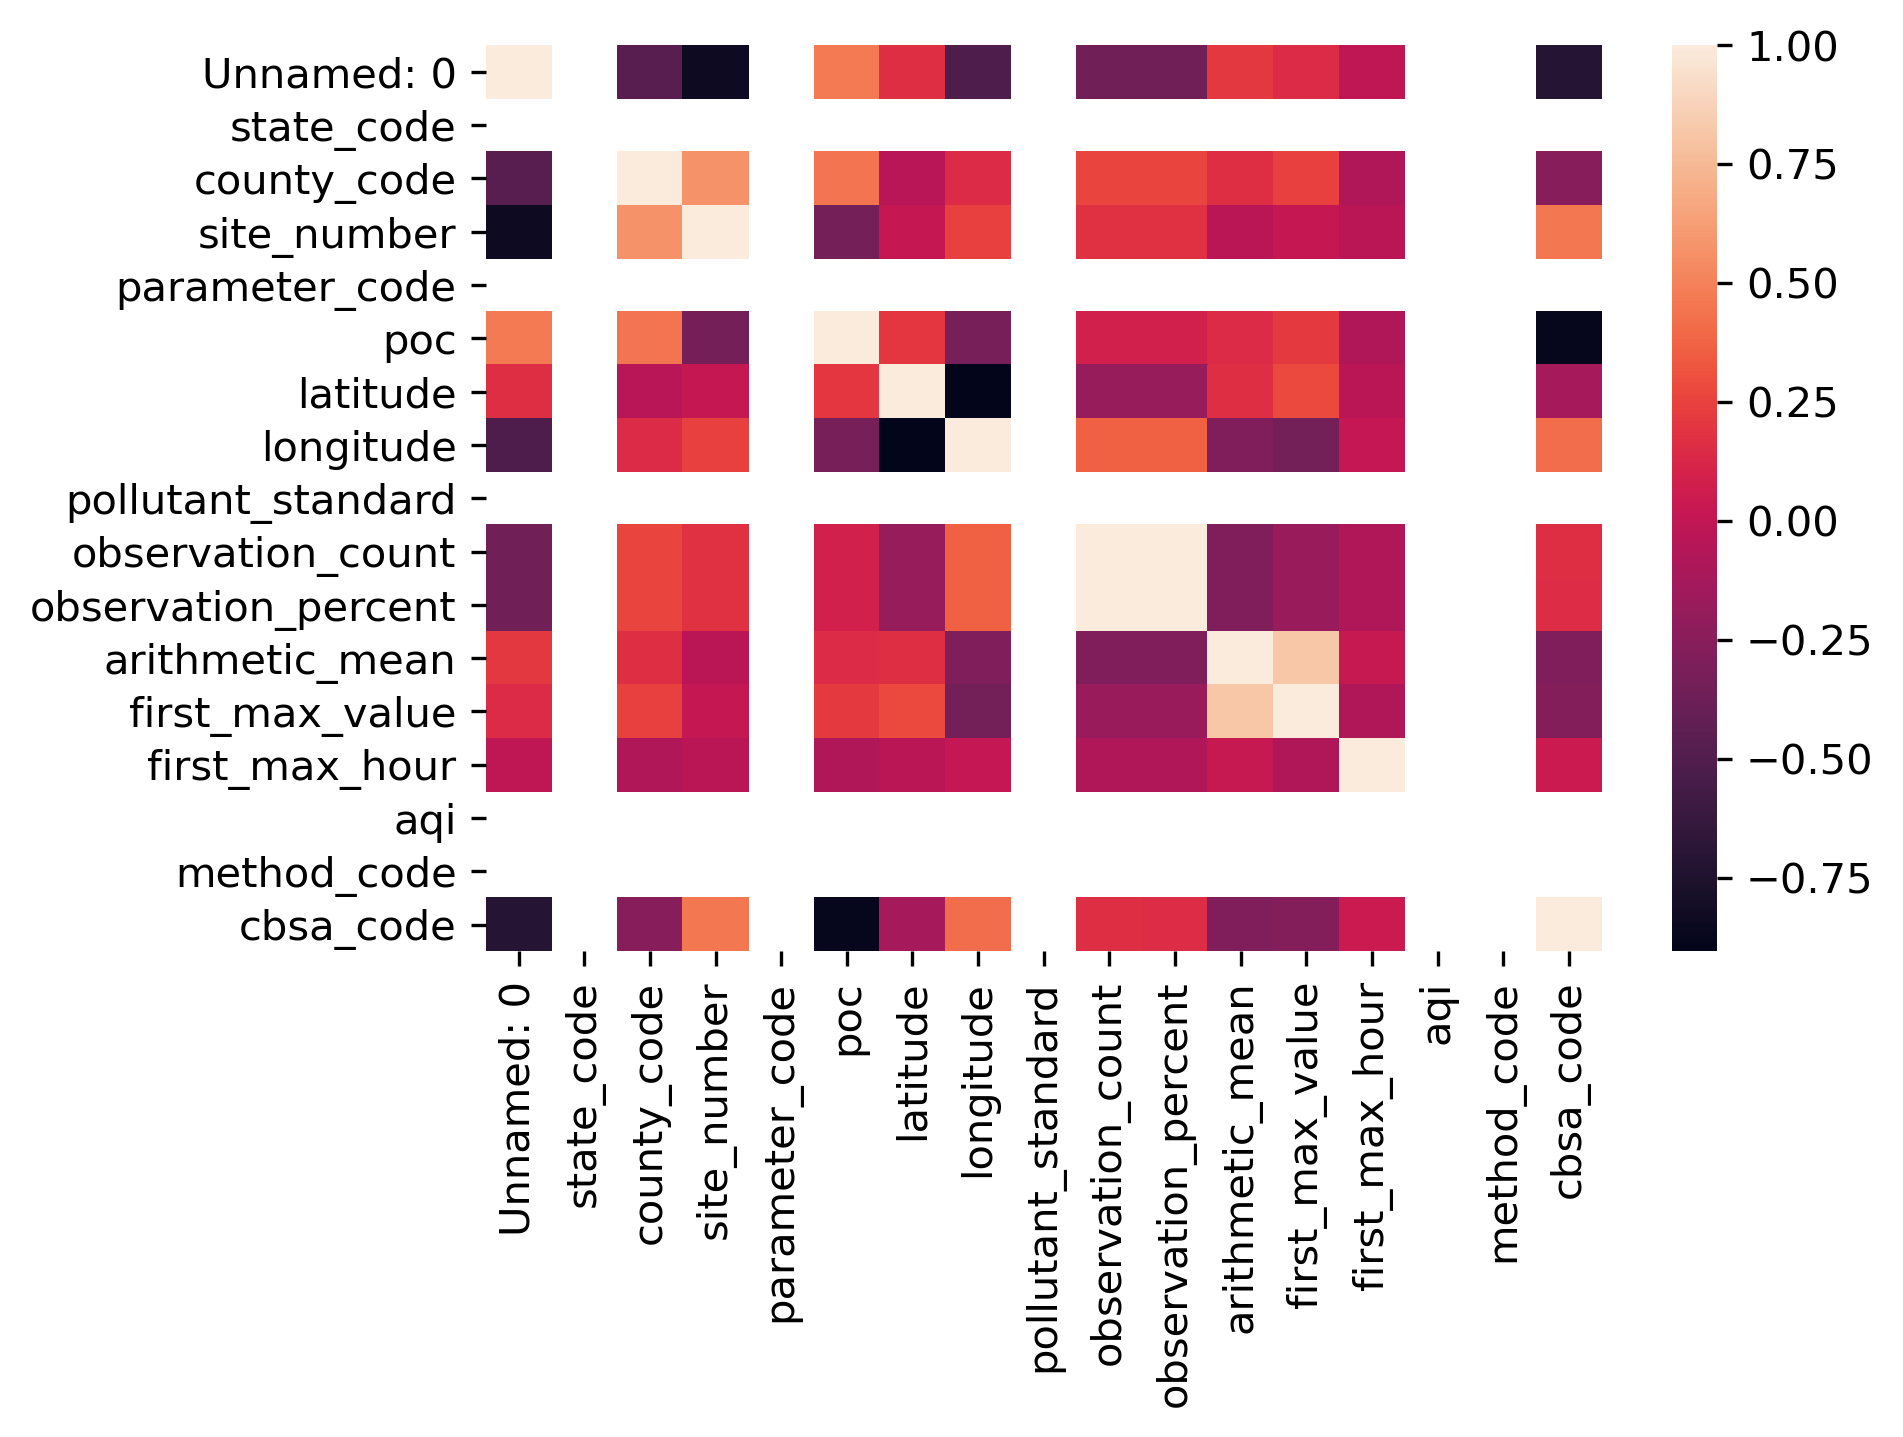

In [3]:

corr=HumidityDf.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(3)
# plt.matshow(corr)
# plt.show()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/filename.png',dpi=300)

In [4]:
missingValueCount=HumidityDf.isnull().sum()
print(missingValueCount)

Unnamed: 0                0
state_code                0
county_code               0
site_number               0
parameter_code            0
poc                       0
latitude                  0
longitude                 0
datum                     0
parameter                 0
sample_duration           0
pollutant_standard     1550
date_local                0
units_of_measure          0
event_type                0
observation_count         0
observation_percent       0
validity_indicator        0
arithmetic_mean           0
first_max_value           0
first_max_hour            0
aqi                    1550
method_code               0
method                    0
local_site_name           0
site_address              0
state                     0
county                    0
city                      0
cbsa_code                 0
cbsa                      0
date_of_last_change       0
dtype: int64


In [5]:
HumidityDf.shape
list(HumidityDf.columns) 
print(HumidityDf['method_code'].unique())
print(HumidityDf['pollutant_standard'].unique())
grouped=HumidityDf.groupby(['pollutant_standard'])
print(grouped['pollutant_standard'].count())
print(HumidityDf['sample_duration'].unique())
print(HumidityDf['units_of_measure'].unique())
print(HumidityDf['event_type'].unique())



[11]
[nan]
Series([], Name: pollutant_standard, dtype: int64)
['1 HOUR']
['Percent relative humidity']
['None']


In [6]:
#1. removing columns

#removing country_code and state_code because it is same for all data points




#2. removing rows
HumidityDfNew=HumidityDf[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','state']].copy()


print(HumidityDfNew.shape)

#----begin converting date_local column type from object to datetime64-------

#3. parsing dates
HumidityDfNew['date_local']=pd.to_datetime(HumidityDfNew['date_local'])

# HumidityDfNew.index=HumidityDfNew['date_local']


#4. null value check

missingValueCount=HumidityDfNew.isnull().sum()
print(missingValueCount)

                               



(1550, 11)
date_local               0
site_number              0
parameter                0
sample_duration          0
pollutant_standard    1550
validity_indicator       0
arithmetic_mean          0
first_max_value          0
aqi                   1550
local_site_name          0
state                    0
dtype: int64


In [7]:
######Remove Invalid Values ######

print(HumidityDfNew['validity_indicator'].unique())
grouped=HumidityDfNew.groupby(['validity_indicator'])
print(grouped['validity_indicator'].count())


HumidityDfNew = HumidityDfNew[HumidityDfNew['validity_indicator'] == "Y"] 
print(HumidityDfNew.shape)
# HumidityDfNew.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/ozone_ny_data_2020.csv')




['Y' 'N']
validity_indicator
N      64
Y    1486
Name: validity_indicator, dtype: int64
(1486, 11)


In [8]:
#5. duplicate check

duplicate = HumidityDfNew[HumidityDfNew.duplicated(['date_local','local_site_name','arithmetic_mean','first_max_value','aqi'])] 
    
print(duplicate)

    

Empty DataFrame
Columns: [date_local, site_number, parameter, sample_duration, pollutant_standard, validity_indicator, arithmetic_mean, first_max_value, aqi, local_site_name, state]
Index: []


In [9]:
#6. removing outliers using robust z-score --- use this

#plot some graph
med=np.median(HumidityDfNew['arithmetic_mean'])
ma = stats.median_abs_deviation(HumidityDfNew['arithmetic_mean'])
mad=np.median(ma)
HumidityDfNew = HumidityDfNew.query('(((0.6745*(arithmetic_mean-@med))/@mad)<3) & (((0.6745*(arithmetic_mean-@med))/@mad)>-3)')
print(HumidityDfNew.shape)
HumidityDfNew.describe()

(1483, 11)


,site_number,pollutant_standard,arithmetic_mean,first_max_value,aqi
count,1483.000000,0.0,1483.000000,1483.000000,0.0
mean,579.532030,NaN,68.338490,86.550910,NaN
std,770.077202,NaN,14.305882,12.643692,NaN
min,3.000000,NaN,26.708333,37.000000,NaN
25%,5.000000,NaN,58.729166,82.000000,NaN
50%,133.000000,NaN,70.000000,91.000000,NaN
75%,1007.000000,NaN,79.208333,95.000000,NaN
max,2004.000000,NaN,98.875000,99.000000,NaN


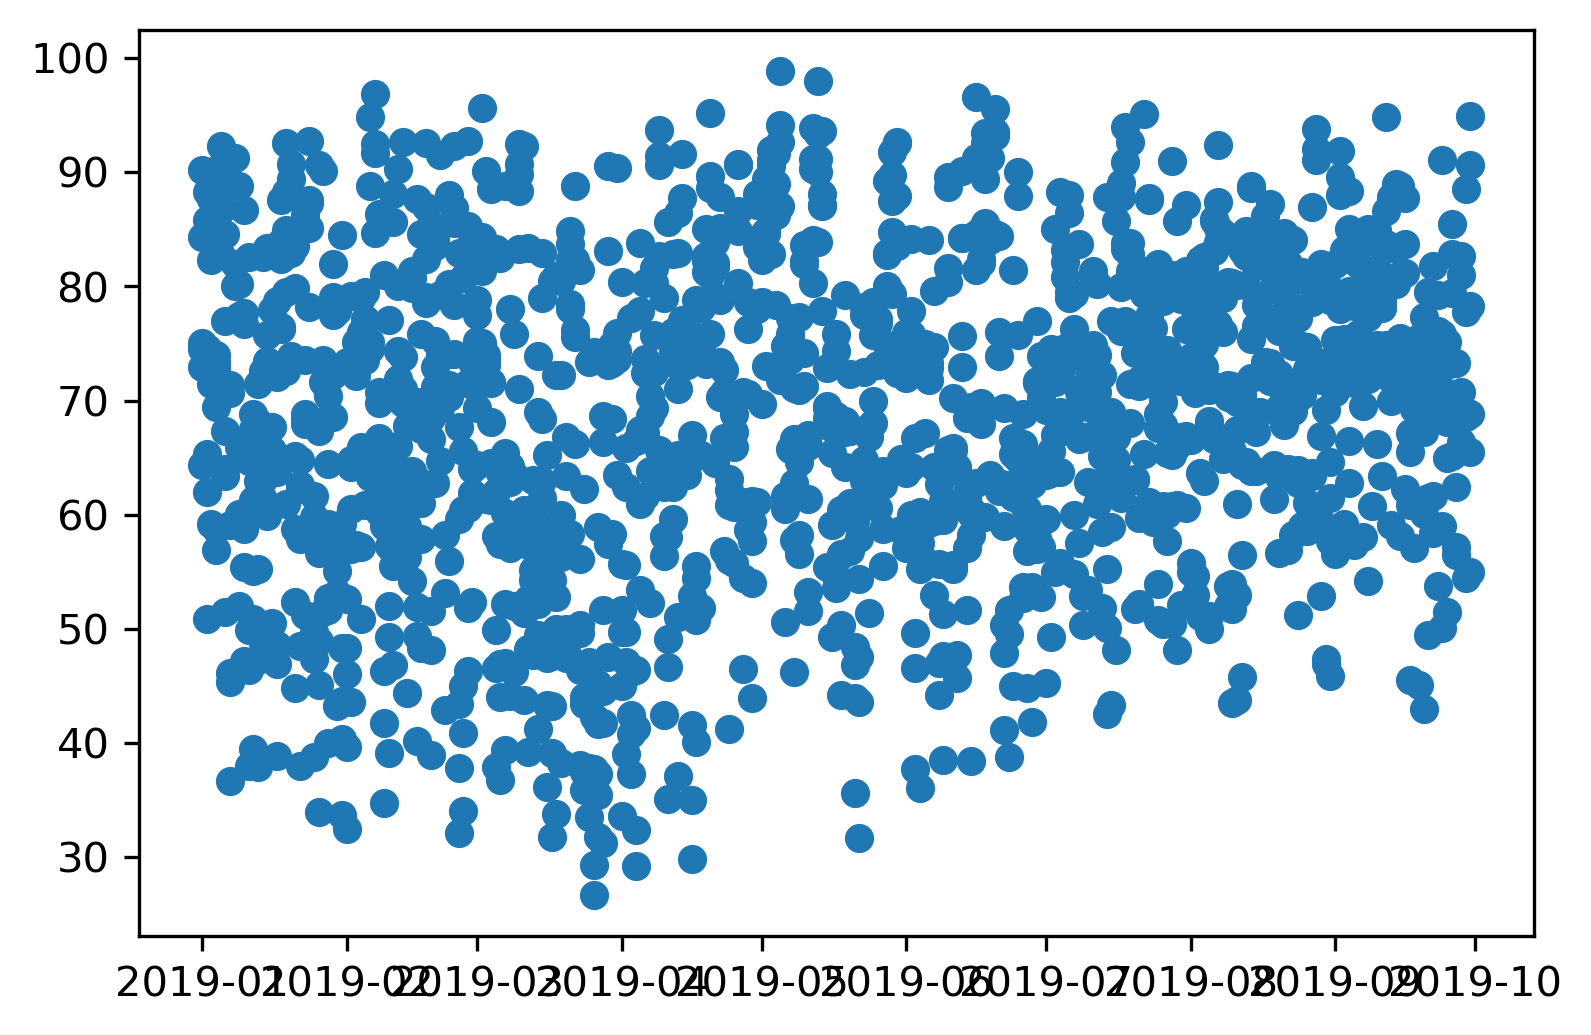

In [10]:
#group by date and average
plt.scatter(x=HumidityDfNew['date_local'], y=HumidityDfNew['arithmetic_mean'])

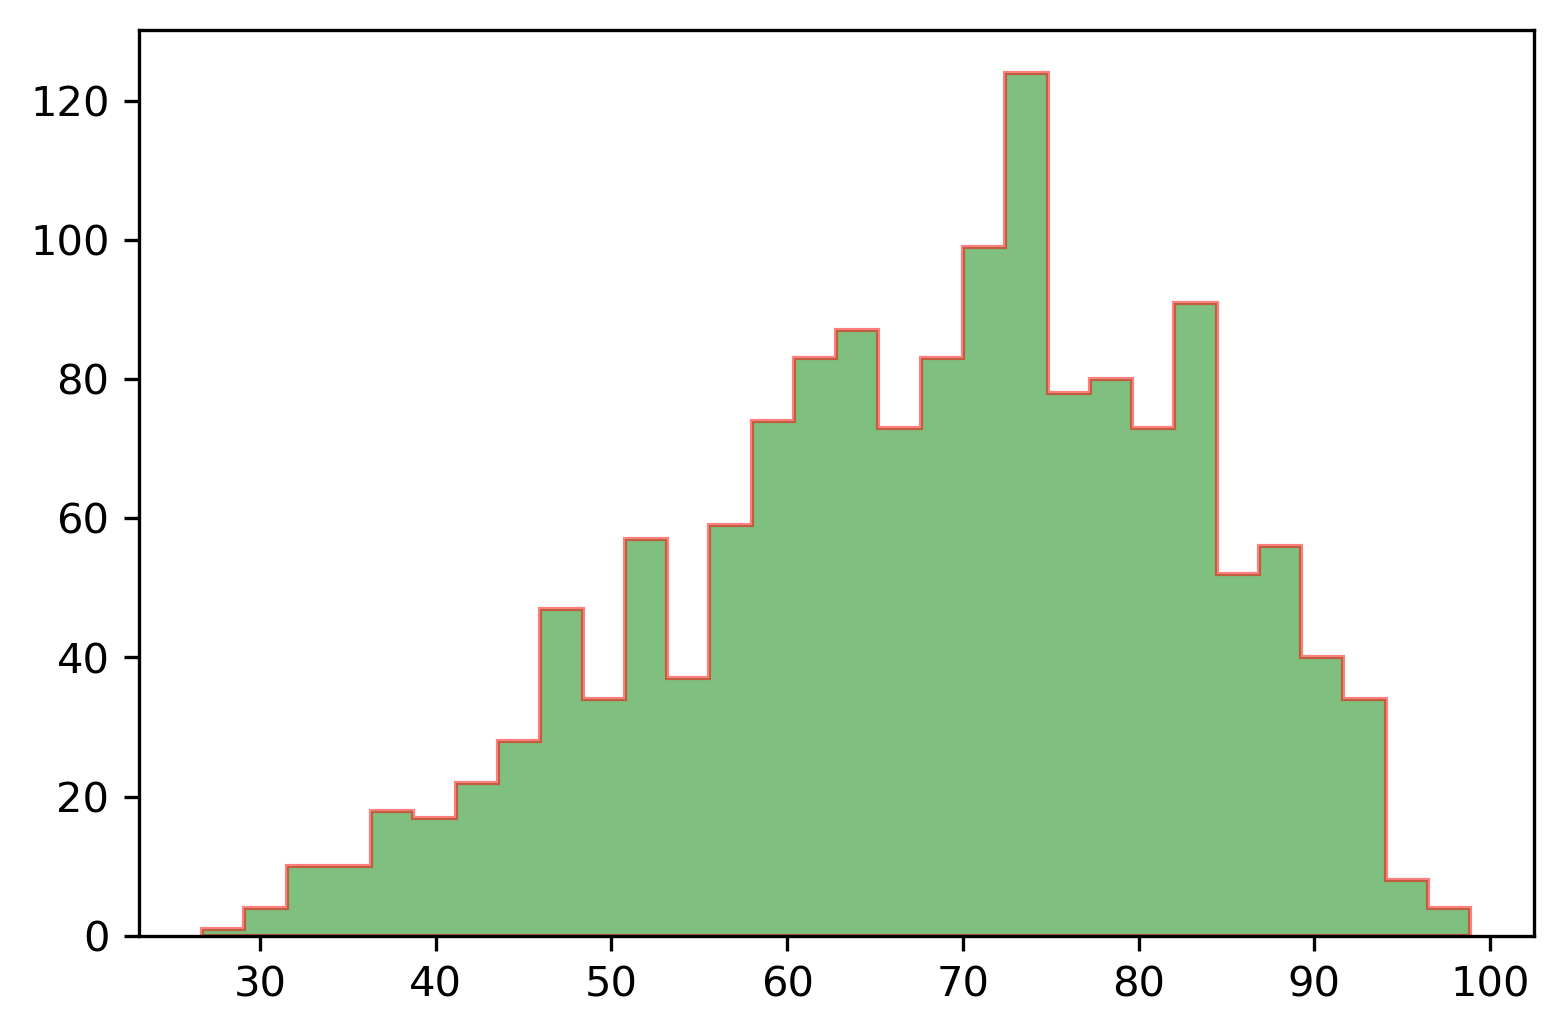

In [11]:
plt.hist(HumidityDfNew['arithmetic_mean'], bins=30, alpha=0.5,
histtype='stepfilled', color='green',
edgecolor='red');

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


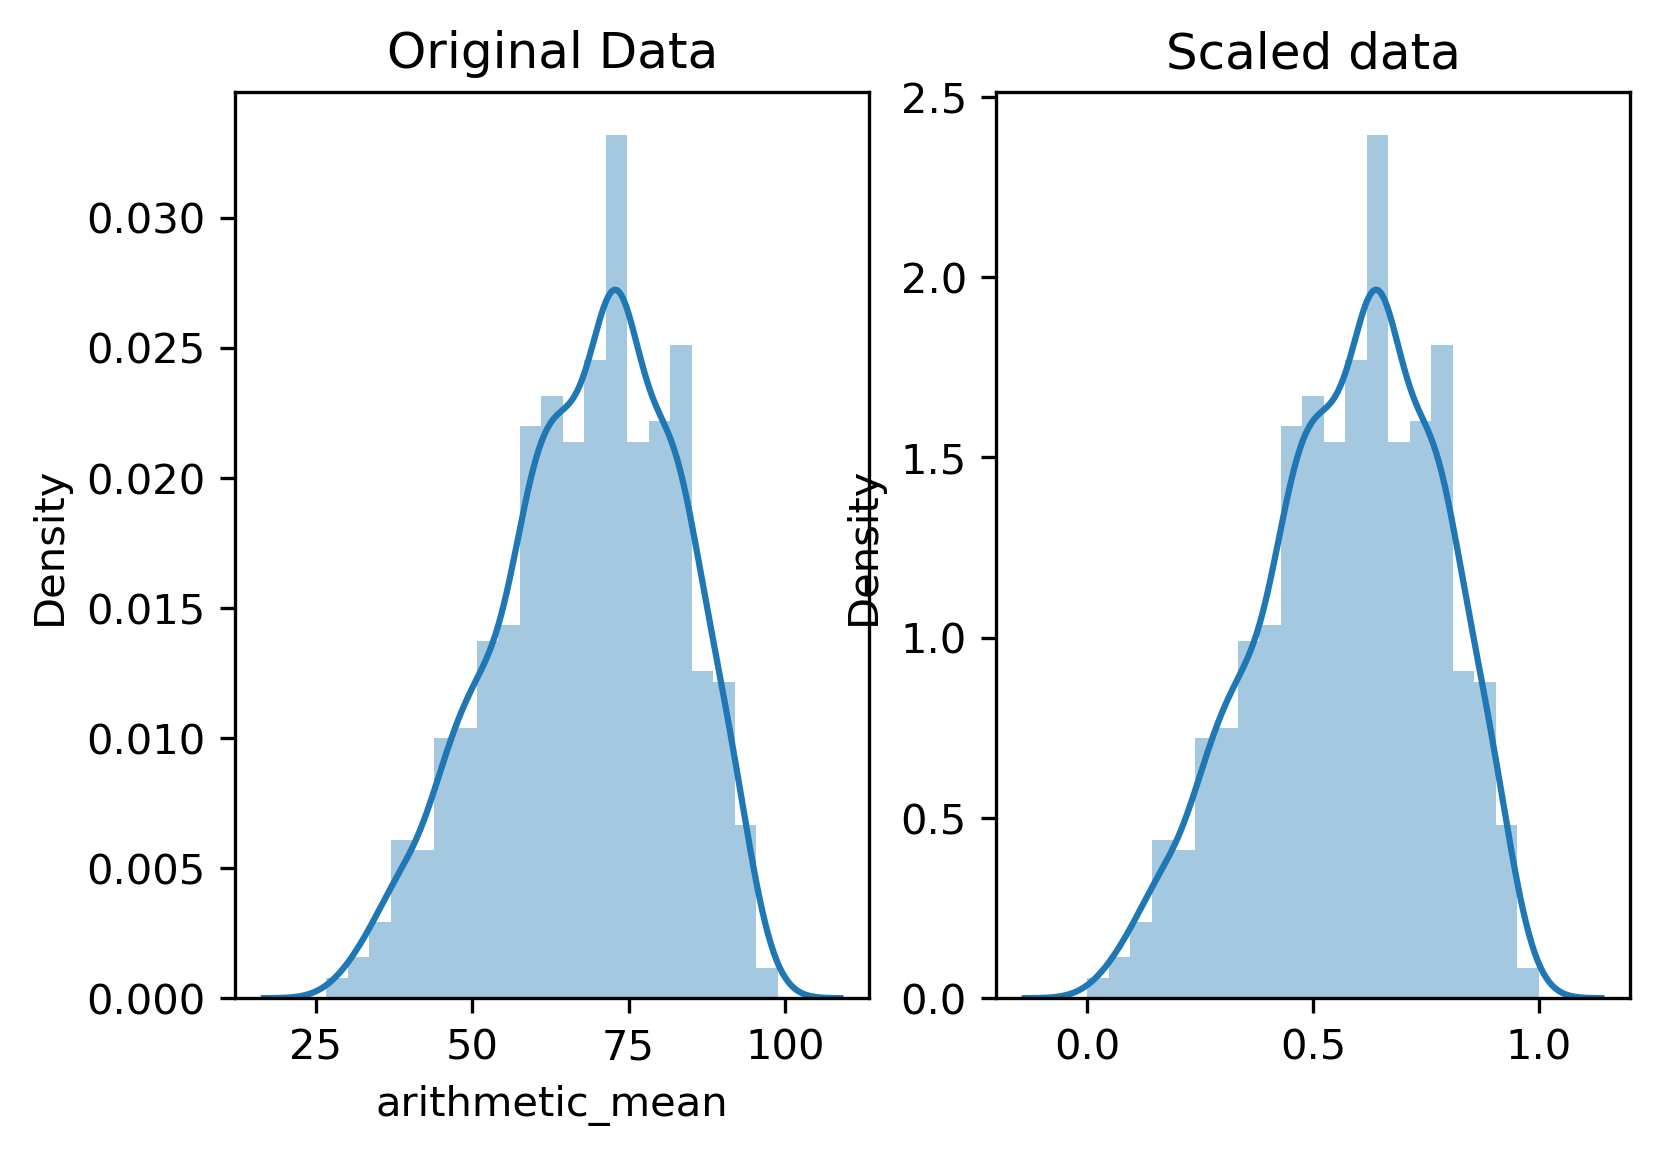

In [12]:
#7.scale

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(HumidityDfNew['arithmetic_mean'].to_numpy().reshape(-1,1))
fig, ax=plt.subplots(1,2)

sns.distplot(HumidityDfNew['arithmetic_mean'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
HumidityDfNew['arithmetic_mean']=scaled_data

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

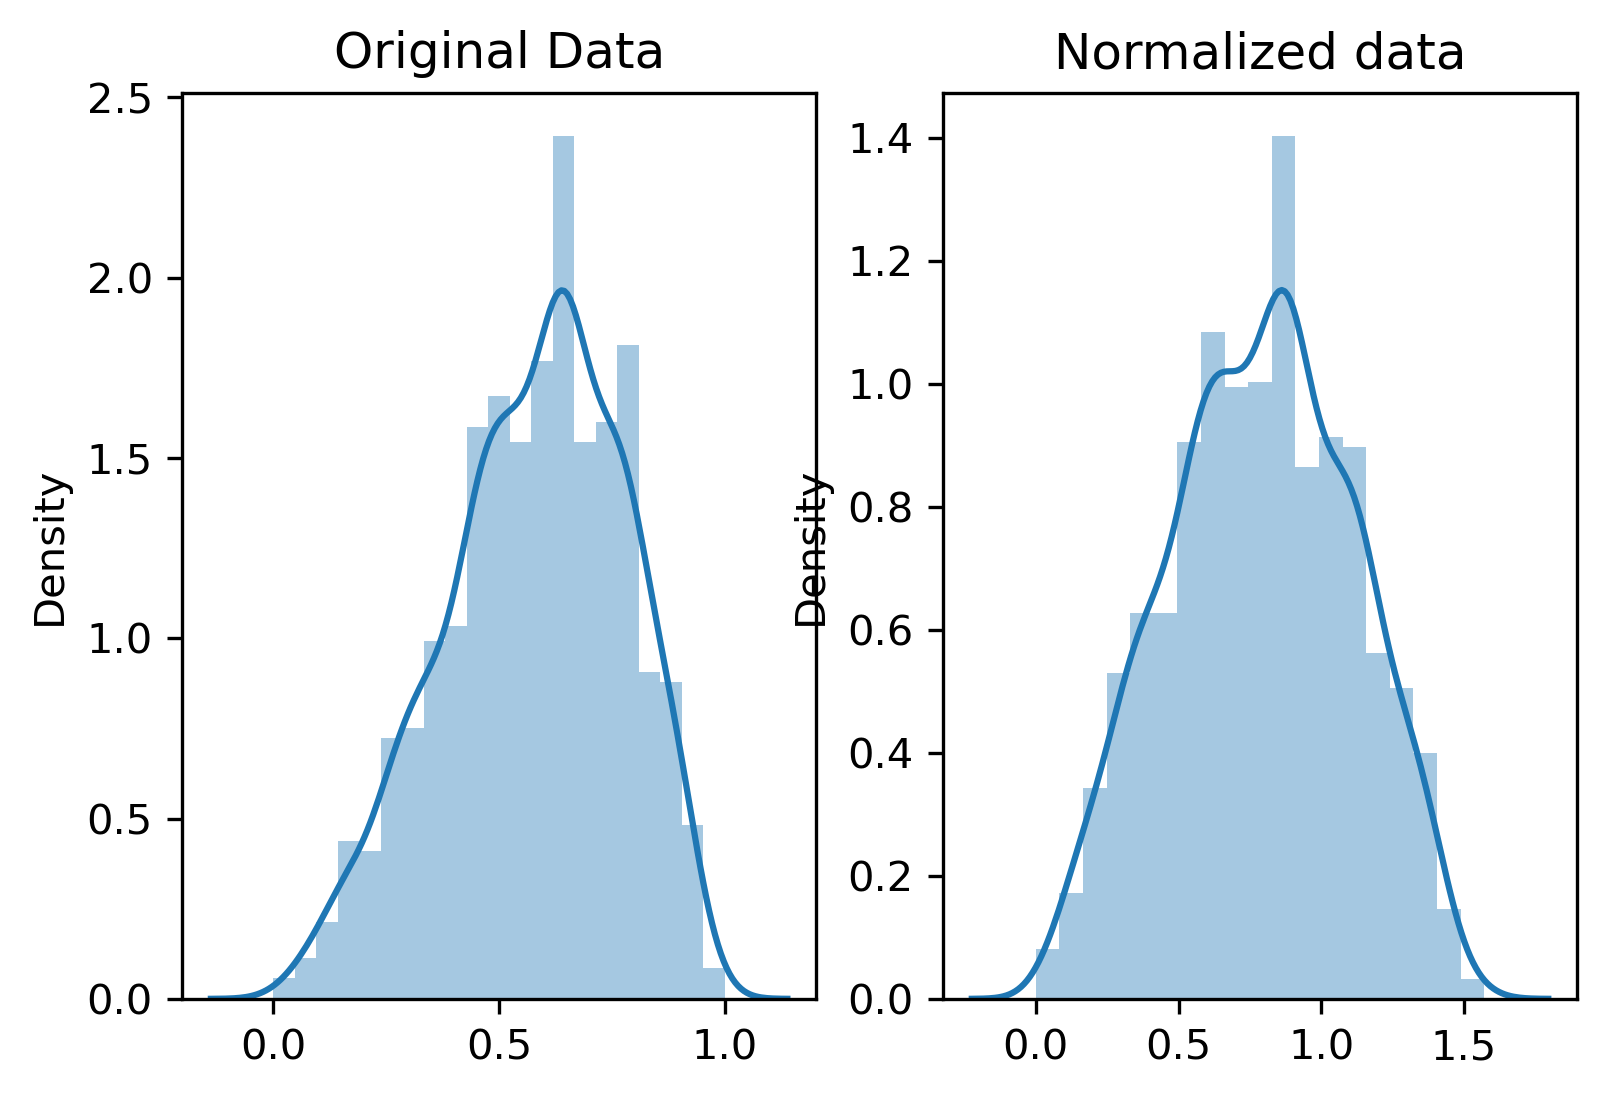

In [13]:
#8.normalize

normalized_data = stats.yeojohnson(HumidityDfNew['arithmetic_mean'])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(scaled_data.flatten(), ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [ ]:
# 9. Adding season column


In [ ]:
#10 . Merging


In [ ]:
sns.pairplot(df, hue="species")